# Variography

In this preamble, we load the **gstlearn** library.

In [97]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Preamble

In [98]:
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request

flagInternetAvailable = True ## Set to false if no internet

Then the necessary data set is downloaded and named **dat**: the target variable is **January_temp**

In [99]:
fileNF='Scotland_Temperatures.NF'
if flagInternetAvailable:
    temp_nf, head = urllib.request.urlretrieve('https://soft.minesparis.psl.eu/gstlearn/data/Scotland/'+fileNF,'./'+fileNF)
else:
    temp_nf='./'+fileNF

dat = gl.Db.createFromNF(temp_nf)

## Variogram Cloud

The data is modeled as *samples of a regionalized* variable $z$, i.e. as evaluations at locations $x_1,..,x_n$ of a variable $z$ defined across a spatial domain: 
$$\lbrace z_i = z(x_i) : i = 1, ..., n\rbrace.$$

The variogram cloud is the set of pair of points defined as
$$ \big\lbrace \big( \Vert x_i - x_j\Vert,  \big\vert z(x_i)-z(x_j)\big\vert^2 \big) \quad\text{where}\quad 1\le i\le j\le n \big\rbrace $$

In **gstlearn**, variogram clouds are computed as grids. We compute the variogram cloud of the dataset, i.e. 

In [100]:
varioParamOmni = gl.VarioParam.createOmniDirection(100)
grid_cloud = gl.db_variogram_cloud(dat, varioParamOmni)
grid_cloud.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 10000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      7.789     0.068
Number :        100       100

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Cloud.January_temp - Locator = NA
 

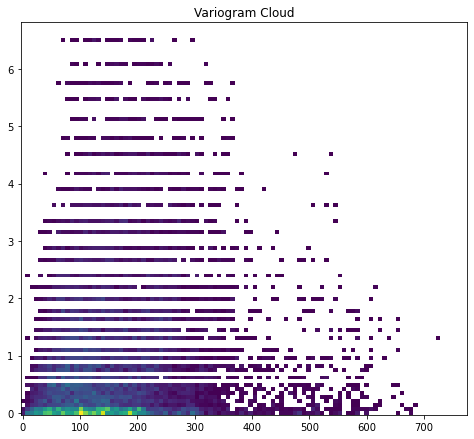

In [101]:
ax = grid_cloud.plot("Cloud.January*")
plt.gca().set_aspect('100')
ax.decoration(title="Variogram Cloud")

## Experimental (isotropic) variograms

The experimental (isotropic) variogram $\gamma$ is a  function defined as

$$\gamma(h)=\frac{1}{2\vert N(h)\vert}\sum_{(i,j) \in N(h)}\big\vert z(x_i)-z(x_j)\big\vert^2, \quad h\ge 0,$$

where $N(h)$ is set of all pairs of data points separated by a distance $h$ (called *lag*):
$$ N(h) = \bigg\lbrace (i,j) : \Vert x_j-x_i\Vert = h\bigg\rbrace_{1\le i\le j\le n},$$

and $\vert N(h)\vert$ is the cardinal of $N(h)$. In practice, when computing $\gamma(h)$, we look for pairs of data points separated by a distance $h \pm \tau h$ where $\tau > 0$ is a tolerance on the separation distance $h$. In other words, $N(h)$ is replaced by
$$ \widehat N(h) = \bigg\lbrace (i,j) : (1-\tau)h \le \Vert x_j-x_i\Vert \le (1+\tau) h\bigg\rbrace_{1\le i\le j\le n}$$

To compute an experimental variogram, we start by creating a `VarioParam` object containing the parameters of the variogram. This is done using the function `VarioParam_createOmniDirection`. We can specify the number of lags $h$ for which the experimental variogram is computed (argument `npas`), and the distance between these lags (argument `dpas`), as well as the tolerance $\tau$ on the lags (argument `toldis`).

Then, the experimental variogram is computed in two steps. First, a `Vario` object is initialized from the `VarioParam` object  and the `Db` containing the data points. Then, the values of the experimental variogram at the lags specified by  the `VarioParam` object  are computed using the method `compute` of the `Vario` object (which returns an error code, `0` meaning that no error was detected).

Note : The variable $z$ for which we wish to define the experimental variogram should be the only variable in the `Db` with a `z` locator (i.e. it should have locator `z1` and the other variables should not have a locator starting with `z`). This can be done bu using the method `setLocator` of the `Db` object containing the data. If several variables with `z` locators are present in the `Db`, then cross-variograms between are also computed (this subject will be covered in the course on multivariate analysis). 

In the next example, we compute an experimental variogram with $40$ lags separated by a distance $10$ (meaning that we take $h =10i$ for $i=0, ..., 39$), and consider a tolerance $\tau = 10\%$ for the variogram computations. We use the `Db` `dat`, and select the variable `January_temp` as our variable of interest (by setting its locator to "z").

In [102]:
varioParamOmni = gl.VarioParam.createOmniDirection(npas=40, dpas=10, toldis=0.1)

dat.setLocator("January_temp",gl.ELoc.Z)
varioexp = gl.Vario(varioParamOmni, dat)
err = varioexp.compute()

We now print the contents of the newly created experimental variogram. The $40$ experimental variogram values are displayed (Columun `Value`), together with the number $\vert \widehat N(h)\vert$ of pairs used to compute the value (Columun `Npairs`) and the average distance between the points forming these pairs (Column `Distance`).

In [103]:
varioexp


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 1
Space dimension             = 2
Variance-Covariance Matrix     1.020

Direction #1
------------
Number of lags              = 40
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000     0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =     10.000
Tolerance on distance       =     10.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0     2.000     0.141     0.002
         1    12.000     9.973     0.129
         2    31.000    20.131     0.270
         3    48.000    30.003     0.470
         4    61.000    40.019     0.599
         5    72.000    50.011     0.582
         6    82.000    59.995     0.586
         7    77.000    69.926     0.907
         8    92.000    80.027     0.899
         9    96.000    89.985     0.980
        10    96.000   100.013     0.856
        11

We now plot the experimental variogram. In the resulting figure, the experimental variogram is plotted in blue, and the dashed blacked line corresponds to the value of the variance of the data.

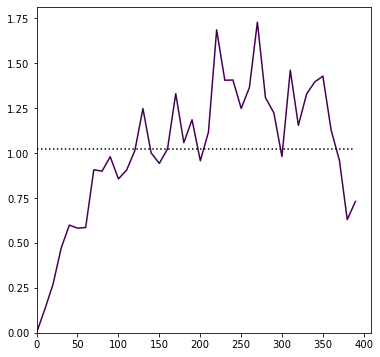

In [104]:
gp.setDefault(dims=[6,6])
gp.varmod(varioexp)
plt.show()

We can also adapt the size of experimental variogram points in the plot so that it is proportional to the number of pairs of points used to compute the value. 

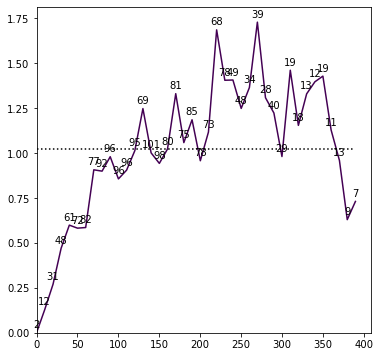

In [105]:
ax = gp.varmod(varioexp,show_pairs=True)

## Automatic Model Fitting

Fitting a variogram model on an experimental variogram is done in two steps. First, we create `Model` object. These objects aim at containing all the necessary information about the covariance structure of a random field. In particular, it is assumed that this covariance structure is a superposition of basic elementary covariance structures: the `Model` objects then contains the covariance types and parameters of each one of these basic covariance structures.

In our case, we wish to build our `Model` object from an experimental variogram, meaning that we want to find a composition of basic covariance structures which would result in a variogram "close" to the experimental variogram that we computed from the data. This is done by calling the method `fit` of the `Model` object, while providing it with the experimental variogram.

In the next example, we create a `Model` object, that we fit on the experimental variogram the we computed earlier. We then plot both the experimental variogram and the variogram model resulting from the fitting using the `plot.varmod` function. In the figure we obtain, In the figure above, the dashed blue line corresponds to the experimental variogram, and the solid blue line corresponds to the fitted variogram model.

In [106]:
fitmod = gl.Model()
err = fitmod.fit(varioexp)

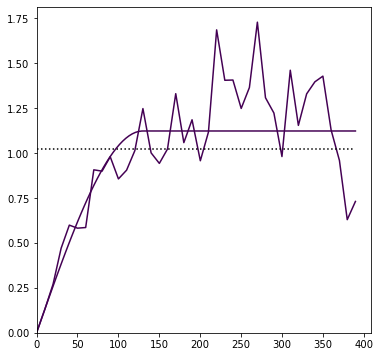

In [107]:
gp.varmod(varioexp, fitmod)
plt.show()

We now print the content of our newly created model. As we can see, only one basic covariance structure is used to define the model (namely, a Spherical covariance function whose range and sill are printed).

In [108]:
fitmod


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 1
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Spherical
- Sill         =      1.123
- Range        =    129.766
Total Sill     =      1.123

### Model Fitting with pre-defined basic structures

It is also possible to guide the model fitting by proposing a list of basic covariance structures from which the model is to be built. The list of available basic covariance structures is obtained by running the following command:

In [109]:
gl.ECov.printAll()

  -2 -     UNKNOWN : Unknown covariance
   -1 -    FUNCTION : External covariance function
    0 -      NUGGET : Nugget effect
    1 - EXPONENTIAL : Exponential
    2 -   SPHERICAL : Spherical
    3 -    GAUSSIAN : Gaussian
    4 -       CUBIC : Cubic
    5 -     SINCARD : Sine Cardinal
    6 -    BESSEL_J : Bessel J
    7 -    BESSEL_K : Bessel K
    8 -       GAMMA : Gamma
    9 -      CAUCHY : Cauchy
   10 -      STABLE : Stable
   11 -      LINEAR : Linear
   12 -       POWER : Power
   13 -   ORDER1_GC : First Order Generalized covariance
   14 -   SPLINE_GC : Spline Generalized covariance
   15 -   ORDER3_GC : Third Order Generalized covariance
   16 -   ORDER5_GC : Fifth Order Generalized covariance
   17 -     COSINUS : Cosine
   18 -    TRIANGLE : Triangle
   19 -      COSEXP : Cosine Exponential
   20 -       REG1D : 1-D Regular
   21 -       PENTA : Pentamodel
   22 -  SPLINE2_GC : Order-2 Spline
   23 -     STORKEY : Storkey covariance in 1-D
   24 -   WENDLAND0 : Wendland 

In practice, we start by creating a list of basic structures using the `ECov_fromKeys` function which we supply with a vector containing the names of the basic structures we would like to see in the model. To fit the model, we then once again call the `fit` method and supply it with both the experimental variogram and the newly created list of basic structures (argument `types`). Then the fitting procedures tries find the composition of models from the supplied list that best fits the experimental variogram. 

Note that by default, the fitting algorithm tries to be parsimonious and can therefore "drop" some of the structures that we supply if it deems that a model with less structures provides a better fit. To force the fitting algorithm to keep all the structures from the list, we  simply need to add the argument `optvar=Option_VarioFit(TRUE)` to the `fit` method.

In the next example, we once again define a model by fitting it on our experimental variogram. But this time, we specify that we want the resulting model to be a composition of basic structures restricted to these choices: a Nugget effect, a Cubic covariance and a Spherical covariance. 

In [110]:
types = [gl.ECov.NUGGET, gl.ECov.CUBIC, gl.ECov.SPHERICAL]
err = fitmod.fit(varioexp, types=types)

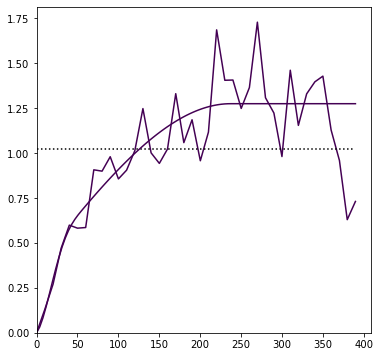

In [111]:
ax = gp.varmod(varioexp, fitmod)

When printing the contents of the model, we now notice that it consists of a superposition of a Cubic covariance and a Spherical covariance, as intended. Note that the Nugget effect does not appear (it has been dropped by the fitting algorithm).

In [112]:
fitmod


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 2
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Cubic
- Sill         =      0.371
- Range        =     58.088
Spherical
- Sill         =      0.904
- Range        =    237.071
Total Sill     =      1.275

### Model Fitting with constraints

It is possible to impose (in)equality constraints on the covariance parameters of the basic structures used in the model fitting procedure. This is done by creating a `Constraints` object that is used to specify the constraints we wish to impose on the parameters of the different basic structures composing the model. To add a constraint to the object, we can use the method `addItemFromParamId`, which takes as arguments the type of parameter for which the constraint applies (given as an `EConsElem` object: run `EConsElem_printAll()` for the list of available options), the index of the basic structure for which the constraint applies (argument `icov`), the type of constraint we wish to apply (argument `type`, given as an `EConsType` object: run `EConsType_printAll()` for the list of available options) and finally the numerical value (argument `value`) defining the constraint.

In the next example, we start from a list of three basic structures (a Nugget effect, a Cubic covariance and a Spherical covariance), and create a `Constraints` object conatining two constrainits. The first one applies to the basic structure of index $1$ (the cubic structure), and sets an upper-bound of $20$ for its range. The second one also applies to the basic structure of index $1$ (the cubic structure), and sets an lower-bound of $0.03$ for its sill. Finally, the `fit` method is called to fit the model on the experimental variogram. Note that we also added the option `optvar=Option_VarioFit(TRUE)` to force the fitting algorithm to keep the three basic structures that we supplied.

In [113]:
types = gl.ECov.fromKeys(["NUGGET","CUBIC","SPHERICAL"])
constraints = gl.Constraints()
err = constraints.addItemFromParamId(gl.EConsElem.RANGE,icov=1,type=gl.EConsType.UPPER,value=20.)
err = constraints.addItemFromParamId(gl.EConsElem.SILL,icov=1,type=gl.EConsType.LOWER,value=0.03)
err = fitmod.fit(varioexp, types, constraints, optvar=gl.Option_VarioFit(True))

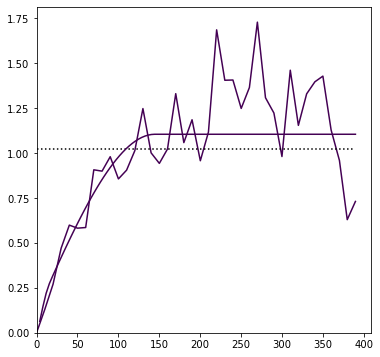

In [114]:
ax = gp.varmod(varioexp, fitmod)

When printing the content of the fitted model, we see that the constraints are indeed satisfied (and that the three basic structures are present).

In [115]:
fitmod


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 3
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Nugget Effect
- Sill         =      0.001
Cubic
- Sill         =      0.115
- Range        =     20.000
Spherical
- Sill         =      0.989
- Range        =    144.544
Total Sill     =      1.104

In the following example, we now apply equality constraints to the parameters. The first one applies to the basic structure of index $1$ (the cubic structure), and sets its range to the value $1000$. The second one also applies to the basic structure of index $1$ (the cubic structure), and sets its sill to the value $0.4$. 

In [116]:
constraints = gl.Constraints()
err = constraints.addItemFromParamId(gl.EConsElem.RANGE,icov=1,type=gl.EConsType.EQUAL,value=1000.)
err = constraints.addItemFromParamId(gl.EConsElem.SILL,icov=1,type=gl.EConsType.EQUAL,value=0.4)
err = fitmod.fit(varioexp, types, constraints, gl.Option_VarioFit(True))

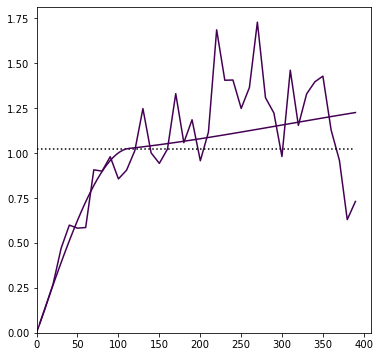

In [117]:
ax = gp.varmod(varioexp, fitmod)

When printing the content of the fitted model, we see that the constraints are once again satisfied (and that the three basic structures are present).

In [118]:
fitmod


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 3
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Nugget Effect
- Sill         =      0.001
Cubic
- Sill         =      0.400
- Range        =   1000.000
Spherical
- Sill         =      0.994
- Range        =    112.870
Total Sill     =      1.395

## Directional Variograms

The experimental directional variogram $\gamma$ is a  function defined as
$$\gamma(\theta,h)=\frac{1}{2\vert N(\theta, h)\vert}\sum_{(i,j) \in N(\theta, h)}\big\vert z(x_i)-z(x_j)\big\vert^2, \quad 0^{\circ}\le \theta <360^{\circ}, \quad h\ge 0$$

where $N(\theta, h)$ is set of all pairs of data points separated by a vector of size $h$ and along the direction $\theta$ (in degrees):
$$ N(\theta, h) = \bigg\lbrace (i,j) : \Vert x_j-x_i\Vert = h \quad\text{and the vector } \vec{u}=(x_j-x_i) \text{ is along the direction } \theta\bigg\rbrace_{1\le i\le j\le n},$$

In practice, when computing $\gamma(\theta, h)$, we once gain consider a tolerance $\tau$ on the separation distance $h$, and also consider a tolerance $\eta>0$ is also considered for the direction angle. In other words, $N(h)$ is replaced by
 $$\widehat N(\theta, h) = \bigg\lbrace (i,j) : (1-\tau)h \le \Vert x_j-x_i\Vert \le (1+\tau) h \quad\text{and the vector } \vec{u}=(x_j-x_i) \text{ is along the direction } \theta \pm \eta \bigg\rbrace_{1\le i\le j\le n},$$
 
 Much like their isotropic counterparts, experimental directional variograms are computed as `Vario` objects, which can be created from he `VarioParam` object (containing the parameters of the variogram) and a `Db` containing the data points. 

This time, the `VarioParam` object is created using the function `VarioParam_createMultiple`. There, we specify the number $K$ of directions $\theta$ for which we wish to compute the an experimental variogram (argument `ndir`), as well as the reference angle $\theta_0$ of the first direction (argument `angref`, default = $0$) so that the directions $\theta$ = $\theta_0 + i(180/K)$ for $i=0,..., K-1$ are considered. We can also specify the number of lags $h$ for which the experimental variogram is computed (argument `npas`), and the distance between these lags (argument `npas`), as well as the tolerance $\tau$ on the lags (argument `toldis`). Then, the experimental variogram is computed just as in the isotropic case.

Note: When initializing the `VarioParam` object as described above, the angle tolerance $\eta$ is automatically set to $\eta = (90/K)$, meaning that we span the set of possible directions.

In the following example, we create an experimental variogram in the $4$ directions $\theta = 0^{\circ}, 45^{\circ}, 90^{\circ}, 135^{\circ}$.

In [119]:
varioParamMulti = gl.VarioParam.createMultiple(ndir=4, npas=15, dpas=15.)
vario_4dir = gl.Vario(varioParamMulti, dat)
err = vario_4dir.compute()

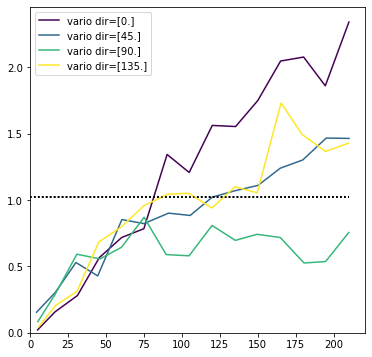

In [120]:
ax = gp.varmod(vario_4dir, flagLegend=True)

Then, fitting a model onto the resulting experimental variogram is done using the same commands as in the isotropic case.

In [121]:
model_4dir = gl.Model()
err = model_4dir.fit(vario_4dir,types=types)

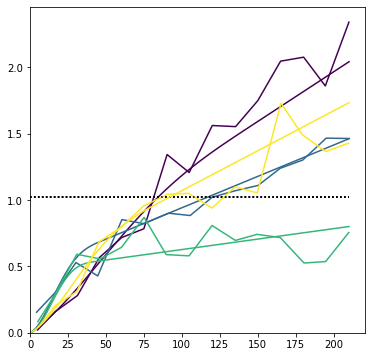

In [122]:
ax = gp.varmod(vario_4dir, model_4dir)

## Variogram Maps

The experimental variogram map is a map centered at the origin, which represents the value of experimental directional variogram across all directions $0^{\circ} \le \theta< 360^{\circ}$.

To compute an experimental variogram map, we use the function `db_vmap_compute` which we supply with the `Db` containing the data. The output is a `Db` containing a grid representing the variogram map values.

In [123]:
grid_vmap = gl.db_vmap_compute(dat)

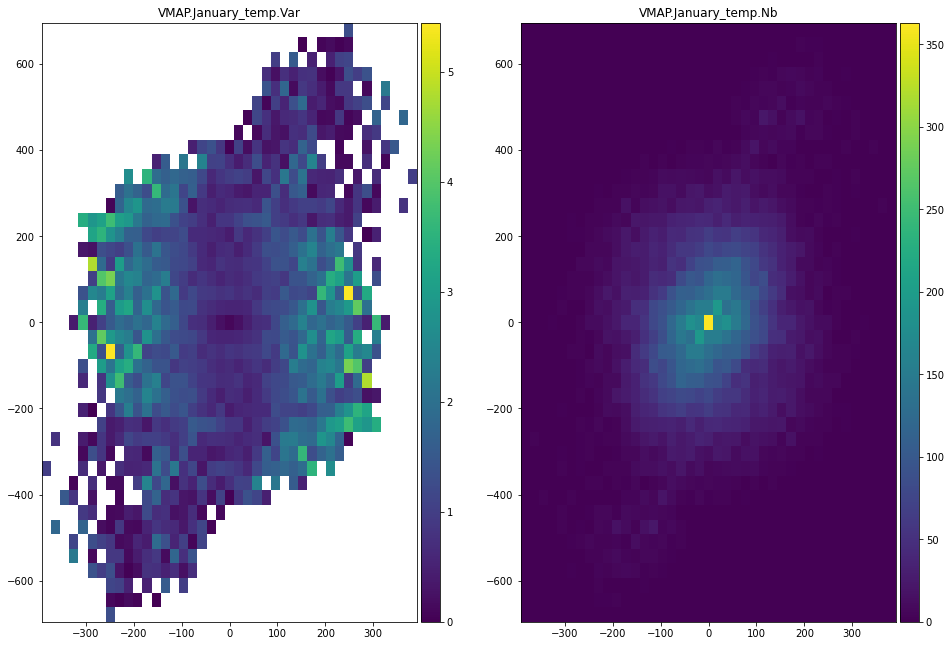

In [124]:
fig, ax = plt.subplots(1,2,figsize=[14,10])
fig.tight_layout(pad=5.0)
ax[0].raster(grid_vmap, flagLegend=True)
ax[1].raster(grid_vmap, name="*Nb", flagLegend=True)
plt.show()

It is then possible to fit a model directly on the experimental variogram map. This if done with the method `fitFromVMap` from the `Model` class. This method is called in the same way as the `fit` method considered up until now (the experimental variograms being now replaced by the experimental variogram map).

In [125]:
modelVM = gl.Model()
err = modelVM.fitFromVMap(grid_vmap, types=types)
modelVM


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 2
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Nugget Effect
- Sill         =      0.257
Cubic
- Sill         =      0.943
- Ranges       =    158.007   214.374
- Angles       =    334.704     0.000
- Rotation Matrix
               [,  0]    [,  1]
     [  0,]     0.904     0.427
     [  1,]    -0.427     0.904
Total Sill     =      1.200

It is then possible to plot the variogram map resulting from the fitted model. To do so, we start by evaluating the fitted variogram model on the the experimental variogram map grid. This is done using the function `dbgrid_model` which we supply with both the experimental variogram map and the fitted model. This function adds a additional variable to the `Db` containing the experimental variogram map corresponding to the evaluations of the variogram model.

In [126]:
err = gl.dbgrid_model(grid_vmap, modelVM)

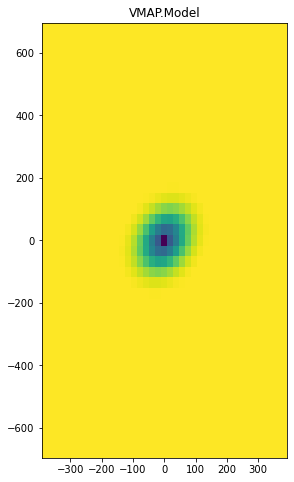

In [127]:
ax = gp.raster(grid_vmap)

Finally, we plot together the experimental directional variograms and the model obtained from fitting the variogram map.

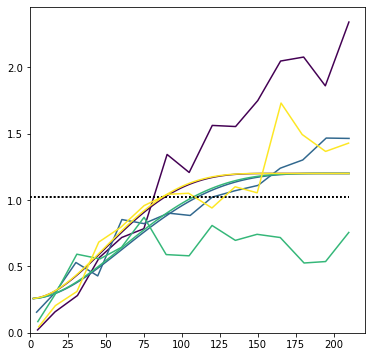

In [128]:
ax = gp.varmod(vario_4dir, modelVM)